In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/airbnb_Chicago.csv')

# Select the desired columns
selected_columns = ['Airbnb Property ID', 'superhost_period_all','host_is_superhost_in_period','prev_host_is_superhost_in_period', 'numCancel_pastYear',
       'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
       'hostResponseAverage_pastYear', 'available_days_aveListedPrice', 'Pets Allowed',
       'Property Type', 'Listing Type', 'Zipcode', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
       'Instantbook Enabled', 'Nightly Rate',
       'Number of Reviews', 'Rating Overall', 'occupancy_rate',
       'zip_total_population', 'zip_hispanic_or_latino_anyrace_percent',
       'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
       'zip_asian_nothispanic_percent','rating_ave_pastYear', 'numReviews_pastYear', 'numReservedDays_pastYear', 'prev_revenue','prev_occupancy_rate','tract_prev_superhosts','tract_prev_superhosts_ratio','prev_Rating Overall','prev_Number of Reviews','prev_Nightly Rate']

# Create a new dataframe with selected columns
data = df[selected_columns]
print(data.shape)
# Display the first few rows of the new dataframe
print("First 5 rows of the new dataframe:")
data.shape

# Explore other analysis tasks with the new dataframe as needed...


(120217, 39)
First 5 rows of the new dataframe:


(120217, 39)

In [ ]:
Threshold_rating_jm = 0.7
Threshold_trips_jm = 8
Threshold_rr_jm = 80
Threshold_cr_jm = 5

Threshold_rating_jp = 0.9
Threshold_trips_jp = 12
Threshold_rr_jp = 95


In [ ]:
data['superhost_period_all'].unique()

array([13., 15., 18., 19., 20.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14., 16., 17.])

In [ ]:
p1 = 14
p2 = 15
p3 = 16

In [ ]:
data_10 = data[
    (data['prop_5_StarReviews_pastYear'] >= Threshold_rating_jm) &
    (data['numReserv_pastYear'] >= Threshold_trips_jm) &
    (data['hostResponseAverage_pastYear'] >= Threshold_rr_jm) &
    (data['numCancel_pastYear'] <= Threshold_cr_jm) &
    (data['host_is_superhost_in_period'] == 0) &
    (data['superhost_period_all'] == p1)
]


In [ ]:
data_10.shape

(1987, 39)

In [ ]:
data_11thperiod_jm = data[(
    (data['prop_5_StarReviews_pastYear'] >= Threshold_rating_jm) &
    (data['numReserv_pastYear'] >= Threshold_trips_jm) &
    (data['hostResponseAverage_pastYear'] >= Threshold_rr_jm) &
    (data['numCancel_pastYear'] <= Threshold_cr_jm) &
    (data['host_is_superhost_in_period'] == 0)&
    (data['superhost_period_all'] == p2)
)]
data_11thperiod_jm['treatment'] = 0

data_11thperiod_jp = data[
    ((data['prop_5_StarReviews_pastYear'] <= Threshold_rating_jp) |
    (data['numReserv_pastYear'] <= Threshold_trips_jp) |
    (data['hostResponseAverage_pastYear'] <= Threshold_rr_jp)) &
    (data['host_is_superhost_in_period'] == 1)&
    (data['superhost_period_all'] == p2)
]
data_11thperiod_jp['treatment'] = 1

data_11 = pd.concat([data_11thperiod_jm, data_11thperiod_jp], axis=0, ignore_index=True)
print(data_11thperiod_jm.shape)
print(data_11thperiod_jp.shape)

(1896, 40)
(1515, 40)


<ipython-input-9-18edf1d2dbfd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11thperiod_jm['treatment'] = 0
<ipython-input-9-18edf1d2dbfd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11thperiod_jp['treatment'] = 1


In [ ]:
# Merge the two DataFrames based on 'Airbnb Property ID'
data_10 = pd.merge(data_10, data_11[['Airbnb Property ID', 'treatment']], on='Airbnb Property ID', how='left')


In [ ]:
common_property_ids = pd.Series(list(set(data_11['Airbnb Property ID']).intersection(set(data_10['Airbnb Property ID']))))
# Filter both dataframes to only include rows with common Property_IDs

df1_filtered = data_11[data_11['Airbnb Property ID'].isin(common_property_ids)]
df2_filtered = data_10[data_10['Airbnb Property ID'].isin(common_property_ids)]
# Concatenate the data frames
df = pd.concat([df1_filtered, df2_filtered])

In [ ]:
df.shape

(2778, 40)

In [ ]:
df['period'] = df['superhost_period_all'].map({p1: 0, p2: 1})

In [ ]:
df = df.dropna()

df.shape

(1467, 41)

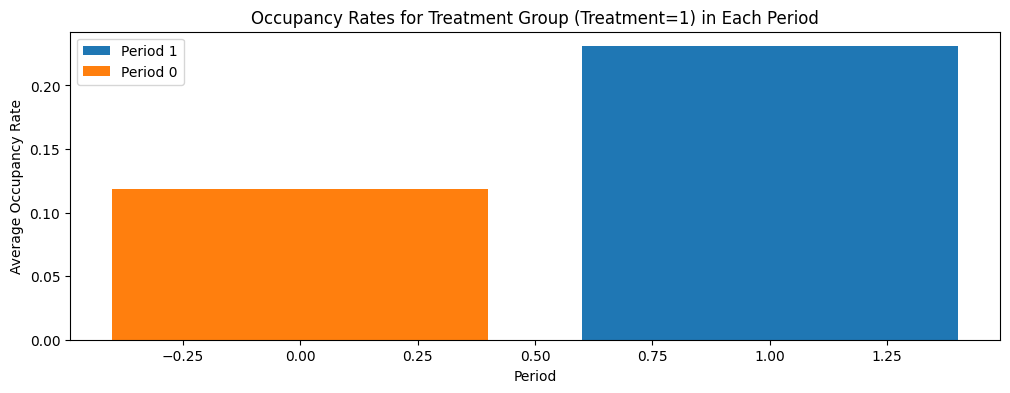

In [ ]:
import matplotlib.pyplot as plt

# Filter rows where treatment column is equal to 1
treatment_df = df[df['treatment'] == 1]

# Create a bar chart for occupancy rates for each period
plt.figure(figsize=(12, 4))
for period in df['period'].unique():
    period_data_treatment = treatment_df[treatment_df['period'] == period]
    plt.bar(period, period_data_treatment['occupancy_rate'].mean(), label=f'Period {period}')

plt.title('Occupancy Rates for Treatment Group (Treatment=1) in Each Period')
plt.xlabel('Period')
plt.ylabel('Average Occupancy Rate')
plt.legend()
plt.show()


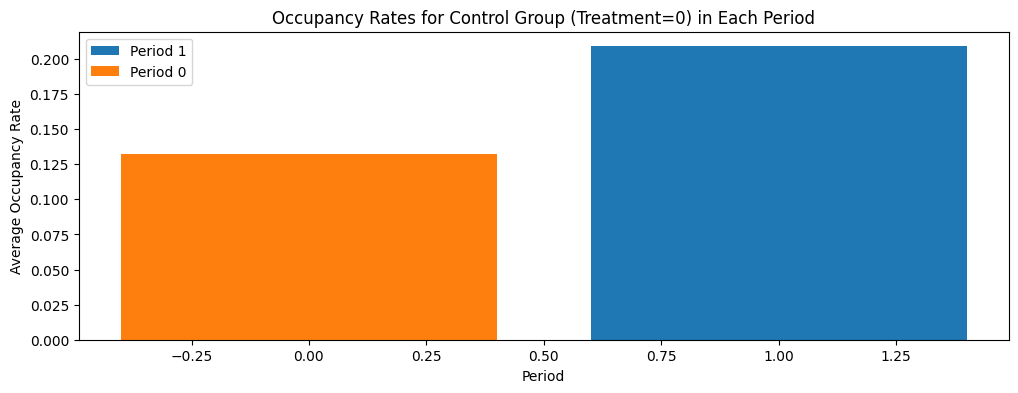

In [ ]:
import matplotlib.pyplot as plt

# Filter rows where treatment column is equal to 1
control_df = df[df['treatment'] == 0]

# Create a bar chart for occupancy rates for each period
plt.figure(figsize=(12, 4))
for period in df['period'].unique():
    period_data_control = control_df[control_df['period'] == period]
    plt.bar(period, period_data_control['occupancy_rate'].mean(), label=f'Period {period}')

plt.title('Occupancy Rates for Control Group (Treatment=0) in Each Period')
plt.xlabel('Period')
plt.ylabel('Average Occupancy Rate')
plt.legend()
plt.show()


In [ ]:
# Filter rows where superhost_period_all equals 12
data_12 = data[data['superhost_period_all'] == p3]


In [ ]:
data_12.head()

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,prev_revenue,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate
16,2384.0,16.0,1.0,1.0,0.0,1.000000,53.0,100.000000,64.953368,False,...,5.000000,31.0,227.0,4392.0,0.337719,3.0,0.500000,100.0,141.0,75.0
32,4505.0,16.0,1.0,1.0,0.0,0.791667,54.0,96.928571,107.898876,False,...,4.791667,24.0,153.0,4113.0,0.175532,13.0,0.541667,96.0,366.0,152.0
51,7005.0,16.0,0.0,0.0,1.0,1.000000,29.0,100.000000,82.000000,False,...,5.000000,15.0,339.0,NaN,NaN,12.0,0.272727,NaN,NaN,NaN
63,7126.0,16.0,0.0,0.0,0.0,0.797101,71.0,100.000000,73.994652,False,...,4.724638,69.0,186.0,6034.0,0.352941,27.0,0.540000,92.0,331.0,90.0
79,9811.0,16.0,0.0,0.0,2.0,0.691358,270.0,94.533835,109.495868,False,...,4.592593,81.0,1558.0,1651.0,0.100840,25.0,0.446429,93.0,33.0,230.0


In [ ]:
# Check for duplicate values in 'Airbnb Property ID' in data_11 or data_12
duplicate_ids_11 = data_11['Airbnb Property ID'].duplicated()
duplicate_ids_12 = data_12['Airbnb Property ID'].duplicated()

# Merge df with data_11 and data_12 based on 'Airbnb Property ID'
merged_df = pd.merge(df, data_11[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_11'))
merged_df = pd.merge(merged_df, data_12[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_12'))

# Create a new column 'occupancy_rate_next' in df based on the values from data_11 and data_12
df['occupancy_rate_next'] = None  # Initialize the column with None

# Reset the index to avoid non-unique column names issue
merged_df = merged_df.reset_index(drop=True)
df = df.reset_index(drop=True)

# Rename columns to make them unique
merged_df = merged_df.rename(columns={'occupancy_rate_11': 'occupancy_rate_11', 'occupancy_rate_12': 'occupancy_rate_12'})

# Convert the 'occupancy_rate_next' column to float
df['occupancy_rate_next'] = pd.to_numeric(merged_df['occupancy_rate_11'], errors='coerce').where(df['period'] == 0, pd.to_numeric(merged_df['occupancy_rate_12'], errors='coerce'))


In [ ]:

# Print the updated DataFrame
df = df.dropna()


In [ ]:
df.shape

(1303, 42)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'occupancy_rate', 'period', 'treatment' are column names
# Create the interaction term
df['interaction_term'] = df['period'] * df['treatment']

# Separate features (X) and target variable (y)
# X = df[['period', 'treatment', 'interaction_term', 'numCancel_pastYear',
#        'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
#        'hostResponseAverage_pastYear','rating_ave_pastYear', 'numReviews_pastYear', 'prev_occupancy_rate','prev_revenue', 'numReservedDays_pastYear','Property Type','Pets Allowed','prev_Rating Overall','prev_Number of Reviews','prev_Nightly Rate']]

X = df[['period', 'treatment', 'interaction_term', 'numCancel_pastYear',
       'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
       'hostResponseAverage_pastYear','rating_ave_pastYear', 'numReviews_pastYear', 'numReservedDays_pastYear','Property Type','Pets Allowed','prev_Rating Overall','prev_Number of Reviews','prev_Nightly Rate', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
       'Instantbook Enabled', 'Nightly Rate',
       'Number of Reviews', 'Rating Overall', 'zip_total_population', 'zip_hispanic_or_latino_anyrace_percent',
       'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
       'zip_asian_nothispanic_percent']]

X = pd.get_dummies(X, columns=['Pets Allowed', 'Property Type'])
# y = df[['occupancy_rate_next']]
y = np.log1p(df[['occupancy_rate']])

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.16e-59
Time:                        01:07:41   Log-Likelihood:                 1295.5
No. Observations:                1303   AIC:                            -2505.
Df Residuals:                    1260   BIC:                            -2283.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
df['Airbnb Property ID'].unique()

NameError: ignored